# Geophysical Data Analysis
### SA03 - Python Basics
 **Student:** Henry Truelson\
 **Date:** Febuary 7th, 2023

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#Import Libraries

### Task 1: Visualizing Raw Data

In [3]:
tmax = np.loadtxt(fname='../data/meteo_denver_tmax_2000_2022.txt', delimiter='\t') 
##Loads Data

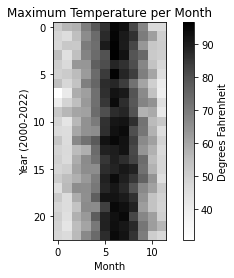

In [4]:
heatMap = plt.imshow(tmax, cmap="Greys") #Defines the Image w/ new color
cbar = plt.colorbar() #Adds a Color Bar
cbar.set_label('Degrees Fahrenheit')
plt.title('Maximum Temperature per Month')
plt.xlabel('Month')
plt.ylabel('Year (2000-2022)')
plt.show() #Shows the Image

As we would expect, the hottest times of the year occur in the middle of the year, which is summer, and the coldest occur during the edges of the year, during the summer. There does not appear to have been any pattern of significant change in the maximum temperature at this specific location over these 22 years as shown in this particular graphic. The maximum temperature of this location occurs consistently in the summer and is likely around 90-100 Degrees F.

### Task 2: Visualizing Distibutions

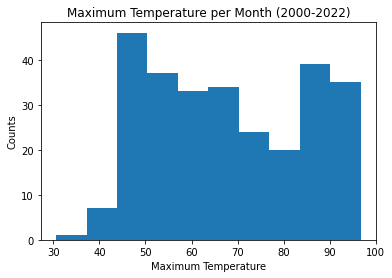

In [4]:
histogram = plt.hist(tmax.flatten(),bins=10)
plt.title('Maximum Temperature per Month (2000-2022)')
plt.xlabel('Maximum Temperature')
plt.ylabel('Counts')
plt.show()

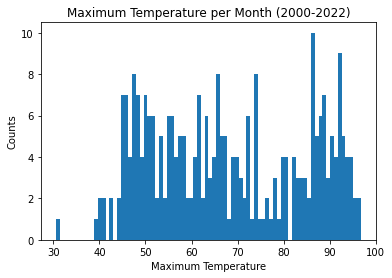

In [5]:
histogram = plt.hist(tmax.flatten(),bins=80)
plt.title('Maximum Temperature per Month (2000-2022)')
plt.xlabel('Maximum Temperature')
plt.ylabel('Counts')
plt.show()

The histogram shows that the spread of maximum temperatures is approximately bimodal, having two rough peaks, one on the lower end and one on the higher end. These correspond to the winter and summer months, respectively. Increasing the bin number effectively increases the resolution and allows us to see a more detailed spread of the counts. Increasing it too high, though, effectively makes the data useless since every unique temperature starts to fall in its own bin. Too low, however, and every temperature gets put into the same bin, so we have to find a good balance.

### Task 3: Monthly Average

In [6]:
##rows are years, columns are months
meanMonthTemp = np.mean(tmax,axis = 0) #Averages across axis 0, which is columns (months)

In [7]:
mnthStdDev = np.std(tmax,axis = 0)

<ErrorbarContainer object of 3 artists>

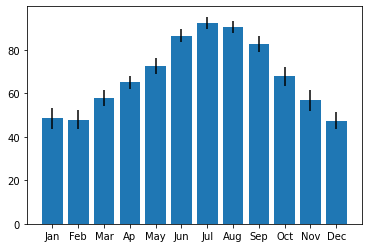

In [8]:
months = ['Jan', 'Feb', 'Mar', 'Ap', 'May', 'Jun', 'Jul',
          'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
barGraph = plt.bar(months,meanMonthTemp)
plt.errorbar(months, meanMonthTemp, yerr=mnthStdDev, fmt="none", color="black")


Thought you wanted a bar graph, reread and realized not so, but I'll leave it just for my reference. Below in the correct line graph.

Text(0.5, 1.0, 'Mean Montly Temperature (2000-2022)')

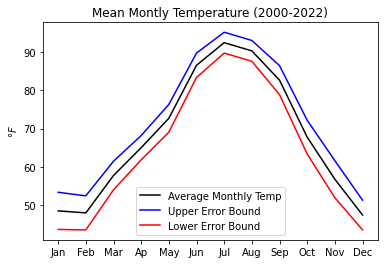

In [9]:
myplot = plt.plot(months,meanMonthTemp, color ="Black")
plt.plot(months,meanMonthTemp+mnthStdDev, color ="Blue")
plt.plot(months,meanMonthTemp-mnthStdDev, color = "Red")
plt.legend(["Average Monthly Temp", "Upper Error Bound", "Lower Error Bound"])
plt.ylabel('$\degree F$')
plt.title("Mean Montly Temperature (2000-2022)")

By smoothing the graph out by taking an average of each month, we can clearly see the temperature behavior we anticipated. The temperature peaks in the middle of the summer, and reaches its minimum during the winter months. Visually, this gives us a lot more obvious informaton that the plot in Task 1. However, since we took the mean, we did lose some information between the two graphs. Each have their uses. On average, July tends to have the highest average temperature, which we'd expect since it's in the middle of the summer. It would appear that January or December have the highest standard deviations. In general, the winter months tended to have a greater standard deviation than the summer months.

### Task 4: Yearly Average

In [10]:
meanYrTemp = np.mean(tmax,axis = 1) #Avgs across the year (row) instead of the month

In [11]:
meanYrTemp.size

23

Text(0.5, 1.0, 'Mean Yearly Temperature (2000-2022)')

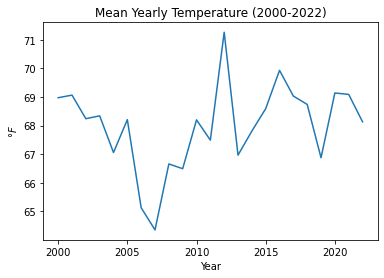

In [12]:
years = np.linspace(2000,2022,23)
yrPlot = plt.plot(years, meanYrTemp)
plt.ylabel('$\degree F$')
plt.xlabel('Year')
plt.title("Mean Yearly Temperature (2000-2022)")

This graph depicts much less of a pattern than the graph for montly temperature. It gives a little more information that the heat map in Task 1, since we can deduce that the overall temperature does not appear to be trending in any direction **for this timeframe and place specifically**. Looks like 2012 had the hottest average maximum temperature of any year in this timeframe at 71 degrees, and 2007 had the lowest average maximum temperature at 64 degrees.

# Part II: Precipitation Data

### Task I: Visualizing the Raw Data

In [17]:
prec = np.loadtxt(fname='../data/meteo_denver_precip_2000_2022.txt', delimiter='\t') 
#Loads Data
#cumulative precipitation for each month during the years 2000-2022 in Denver, CO.

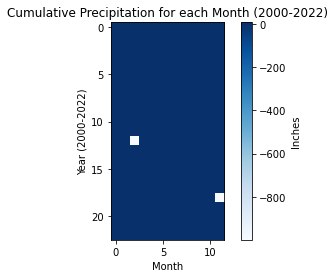

In [18]:
heatMap = plt.imshow(prec, cmap="Blues") #Defines the Image w/ new color
cbar = plt.colorbar() #Adds a Color Bar
cbar.set_label('Inches')
plt.title('Cumulative Precipitation for each Month (2000-2022)')
plt.xlabel('Month')
plt.ylabel('Year (2000-2022)')
plt.show() #Shows the Image

Clearly, something is wrong here. Looks like we have two significant outliers in the data that are so different from the other values that the other points all blend together. There appear to be two bad measurements that are listed with negative values, which obviously shouldn't happen for rainfall.

In [19]:
prec[prec<0] = np.nan #Replaces all negative data points with nan

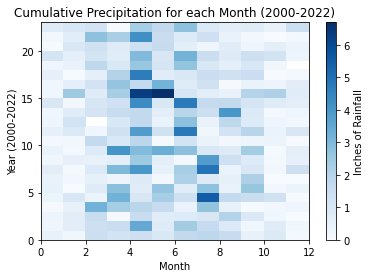

In [20]:
heatMap = plt.pcolormesh(prec, cmap="Blues") #Defines the Image w/ new color
cbar = plt.colorbar() #Adds a Color Bar
cbar.set_label('Inches of Rainfall')
plt.title('Cumulative Precipitation for each Month (2000-2022)')
plt.xlabel('Month')
plt.ylabel('Year (2000-2022)')
plt.show() #Shows the Image

The data is fixed, and we can now actually see useful information in the plot. It appears that in the Denver area, the most precipitation is recieved in the middle of the year during the spring and summer months, with significantly less precipitation during the fall and winter. There doess't appear to be any significant change over time in the amount of rainfall recieved in the Denver area over the years of 2000-2022.

### Task II: Visualizing Distributions

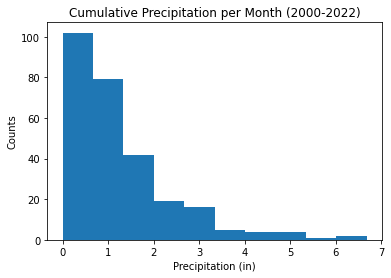

In [37]:
histogram = plt.hist(prec.flatten(),bins=10) #Makes a histogram by flattening the arrays
plt.title('Cumulative Precipitation per Month (2000-2022)')
plt.xlabel('Precipitation (in)')
plt.ylabel('Counts')
plt.show()

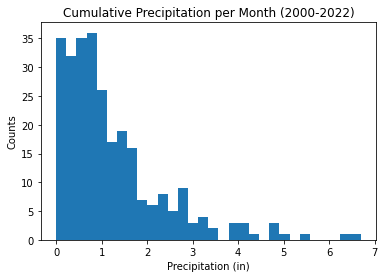

In [40]:
histogram = plt.hist(prec.flatten(),bins=30) #Makes a histogram by flattening the arrays
plt.title('Cumulative Precipitation per Month (2000-2022)')
plt.xlabel('Precipitation (in)')
plt.ylabel('Counts')
plt.show()

The precipitation distribution in Denver follows an exponential (or perhaps Gamma-like) distribution, with the most common values of precipitation being on the very low end. This seems to make sense: precipitation can be pretty limited during the fall and other months of the year to memory, so it makes sense that we most commonly get less than 1 inch in a month. This is different from the maximum temperature in that the graph is cut off near its most common value (since we can't have negative rainfall), wheras the temperature can vary freely and tends towards two most common values during the summer and winter.

Based off the added link, this data could be exponentially, Gamma, F, Weibull, Lognormal, or Birnbaum-Saunders distributed.

### Task III: Monthly Average

In [54]:
##rows are years, columns are months
meanMonthprec = np.nanmean(prec,axis = 0) #Averages across axis 0, which is columns (months)

In [55]:
mnthSD = np.nanstd(prec,axis = 0) #Finds the Standard Deviation across this axis


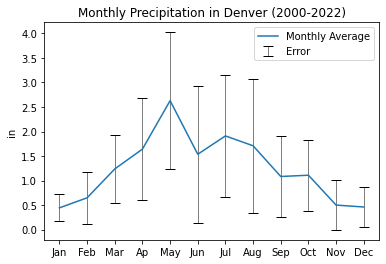

In [79]:
months = ['Jan', 'Feb', 'Mar', 'Ap', 'May', 'Jun', 'Jul',
          'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
barGraph = plt.plot(months,meanMonthprec, label = 'Monthly Average')
plt.errorbar(months, meanMonthprec, yerr=mnthSD, fmt="none", elinewidth = .5,color="black", capsize = 5 , label = 'Error')
plt.title('Monthly Precipitation in Denver (2000-2022)')
plt.ylabel('in')
plt.legend()

This graph does have a roughly normal-looking Gaussian Distribution, peaking in the middle of the year and reaching a minimum at the end of the year. In particular, the spring months appear to get the most rainfall, which is exactly as expected.

### Task IV: Yearly Average

In [90]:
meanYrPrec = np.nanmean(prec,axis = 1) #Avgs across the year (row) instead of the month
totAvg = np.nanmean(prec.flatten()) # Overall Avg Rainfall over all 2000-2022

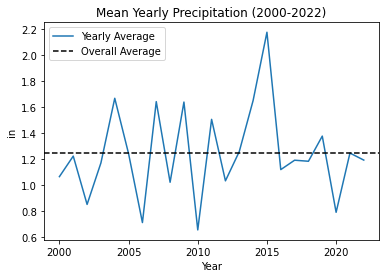

In [98]:
years = np.linspace(2000,2022,23)
yrPlot = plt.plot(years, meanYrPrec, label = 'Yearly Average')
plt.ylabel('in')
plt.xlabel('Year')
plt.title("Mean Yearly Precipitation (2000-2022)")
plt.axhline(y=totAvg, color="black", linestyle="--", label = 'Overall Average')
plt.legend()

We can see based on the behavior of the graph and the added overall average, there has been no significant pattern of deviation from the yearly average precipitation in Denver during the years 2000-2022. The graph consistently oscillates back and forth across the average in a random fashion and as such there is no apparent trend. This graph is similar to the maximum temperature plot, which also oscillates back and forth across the average and has no discernable trend in behavior, suggesting the weather has remained consistent over this period of time.

### Part V: Identifying Extremes

In [126]:
minP = meanYrPrec.argmin() #Find Location of Minimum
print('The year that got the minimum average rainfall was', int(years[minP]), 'with', meanYrPrec[minP], 'in. of precipitation.')

The year that got the minimum average rainfall was 2010 with 0.6533333333333332 in. of precipitation


In [129]:
maxP = meanYrPrec.argmax() #Find Location of Minimum
print('The year that got the maximum average rainfall was', int(years[maxP]), 'with', meanYrPrec[maxP], 'in. of precipitation.')

The year that got the maximum average rainfall was 2015 with 2.1774999999999998 in. of precipitation.


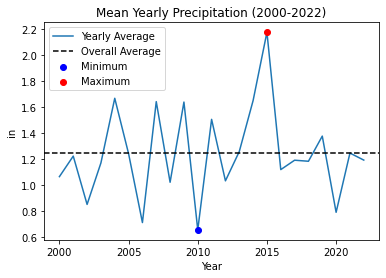

In [137]:
years = np.linspace(2000,2022,23)
yrPlot = plt.plot(years, meanYrPrec, label = 'Yearly Average')
plt.ylabel('in')
plt.xlabel('Year')
plt.title("Mean Yearly Precipitation (2000-2022)")
plt.axhline(y=totAvg, color="black", linestyle="--", label = 'Overall Average')
plt.scatter(years[minP],meanYrPrec[minP], color = "Blue",label = "Minimum", zorder = 10) #Blue Circle on Minimum
plt.scatter(years[maxP],meanYrPrec[maxP], color = "Red", label = "Maximum", zorder = 10) #Red Circle on Maximum
plt.legend()
plt.show()